This was done just to check that on the groun level how much accuracy could be achieved without much feature engineering, etc.



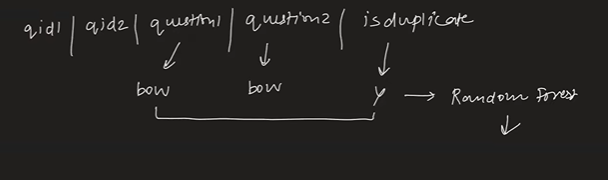

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
new_df = df.sample(30000)

In [6]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
new_df.duplicated().sum()

0

In [8]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
394861,What is Mark Zuckerberg's degree?,Is there any reservation for NT in upsc?
266389,Why is Saltwater Taffy candy imported in Poland?,Why is Saltwater Taffy candy imported in Portu...
32076,Who are the best people on the Internet to fol...,Who are the best people on the Internet to fol...
150593,I have been with my partner for 8 years Last y...,I split up with my wife two years ago. Officia...
128073,Is it legal to earn income from online freelan...,Can 4-5 employers file a petition for your H1-...


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [10]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [15]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
394861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32076,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128073,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
301346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [12]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
394861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32076,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128073,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.742

In [15]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\91842\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:13:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7328333333333333